## Telecom Churn Case Study - Multivariate Logistic Regression

### Problem Description

A telecom firm has collected data of all its customers. The main types of attributes are:

* Demographics (age, gender etc.)
* Services availed (internet packs purchased, special offers taken etc.)
* Expenses (amount of recharge done per month etc.)
 

Based on all this past information, we want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - '1' means that the customer has churned and '0' means the customer has not churned.

### Objectives

The objective here is to build a Logistic Regression model that would predict,with 21 predictor variables, whether a particular customer will switch to another telecom provider or not.

### Approach

We would follow the below steps to development the Logistics Regression (LR) model:

* A. Import Data
* B. Clean & Transform Data
* C. Perform Data Analysis
* D. Preprare Data for Modeling
* E. Build Model
* F. Evaluate Model Quality
* G. Make Predictions on the Test Set
* H. Conclusion


### A. Import Data

#### A.1 Import Data from Files

In [907]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [908]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [909]:
# Importing Churn dataset
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [910]:
# Importing Customer dataset
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [911]:
# Importing Internet Services Dataset
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### A.2 Merge and Consolidate Data

In [913]:
# Merging Churn and Customer data on 'customerID'
telecom = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [914]:
# Merging with Internet Data to create consolidated dataframe with all predictor variables
telecom = pd.merge(telecom, internet_data, how='inner', on='customerID')

#### A.3 Inspect and Understand DataFrame

In [916]:
# Explore the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [917]:
# Check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [918]:
# Review the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [919]:
# Review the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### B. Clean & Transform Data

#### B.1 Convert Binary Variables to 0/1

In [922]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Map "Yes" to 1 and "No" to 0
telecom[varlist] = telecom[varlist].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [923]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### B.2 Convert Categorical Variables to Dummy Features

In [925]:
# Create a dummy variable for a few of the categorical variables and drop the first one.
dummy_df = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Add the results to the master dataframe
telecom = pd.concat([telecom, dummy_df], axis=1)

In [926]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [927]:
# Create dummy variables for the remaining categorical variables with appropriate prefixes and drop those which contain duplicate data

# Define a function to create the dummies with supplied prefix and drop a given column

def createDummyWithDrop(col, prefix, drop_col):
    global telecom, dummy_df
    # Create dummy variables for the given column
    dummy_df = pd.get_dummies(telecom[col], prefix=prefix)
    # Drop the given column
    dummy_df = dummy_df.drop([drop_col], axis=1)
    #Add the results to the master dataframe
    telecom = pd.concat([telecom,dummy_df], axis=1)

In [928]:
# Create dummy variables for the variable 'MultipleLines'
createDummyWithDrop('MultipleLines','MultipleLines','MultipleLines_No phone service')

# Create dummy variables for the variable 'OnlineSecurity'
createDummyWithDrop('OnlineSecurity','OnlineSecurity','OnlineSecurity_No internet service')

# Create dummy variables for the variable 'OnlineBackup'
createDummyWithDrop('OnlineBackup','OnlineBackup','OnlineBackup_No internet service')

# Create dummy variables for the variable 'DeviceProtection'
createDummyWithDrop('DeviceProtection','DeviceProtection','DeviceProtection_No internet service')

# Create dummy variables for the variable 'TechSupport'
createDummyWithDrop('TechSupport','TechSupport','TechSupport_No internet service')

# Create dummy variables for the variable 'StreamingTV'
createDummyWithDrop('StreamingTV','StreamingTV','StreamingTV_No internet service')

# Create dummy variables for the variable 'StreamingMovies'
createDummyWithDrop('StreamingMovies','StreamingMovies','StreamingMovies_No internet service')

In [929]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


In [930]:
telecom.shape

(7043, 43)

In [931]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

#### B.3 Convert Data Types for Specific Columns

In [933]:
# TotalCharges varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [934]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

#### B.4 Check for Outliers

In [936]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [937]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution displayed above, we can see that there are no outliers in our data. The numbers are gradually increasing.

#### B.5 Check for Missing Values and Inpute Them

In [940]:
# Add up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1% of TotalCharges column has missing values. Since the % is minimal, it's best to remove these observations from the analysis

In [942]:
# Remove NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [943]:
# Check percentage of missing values after above removals
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### C. Perform Data Analysis

#### C.1 Assess Correlation among Features

In [947]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [948]:
# Drop the customerID column as that will not be relevant for any analysis or modelling
telecom.drop(['customerID'], axis=1, inplace=True)

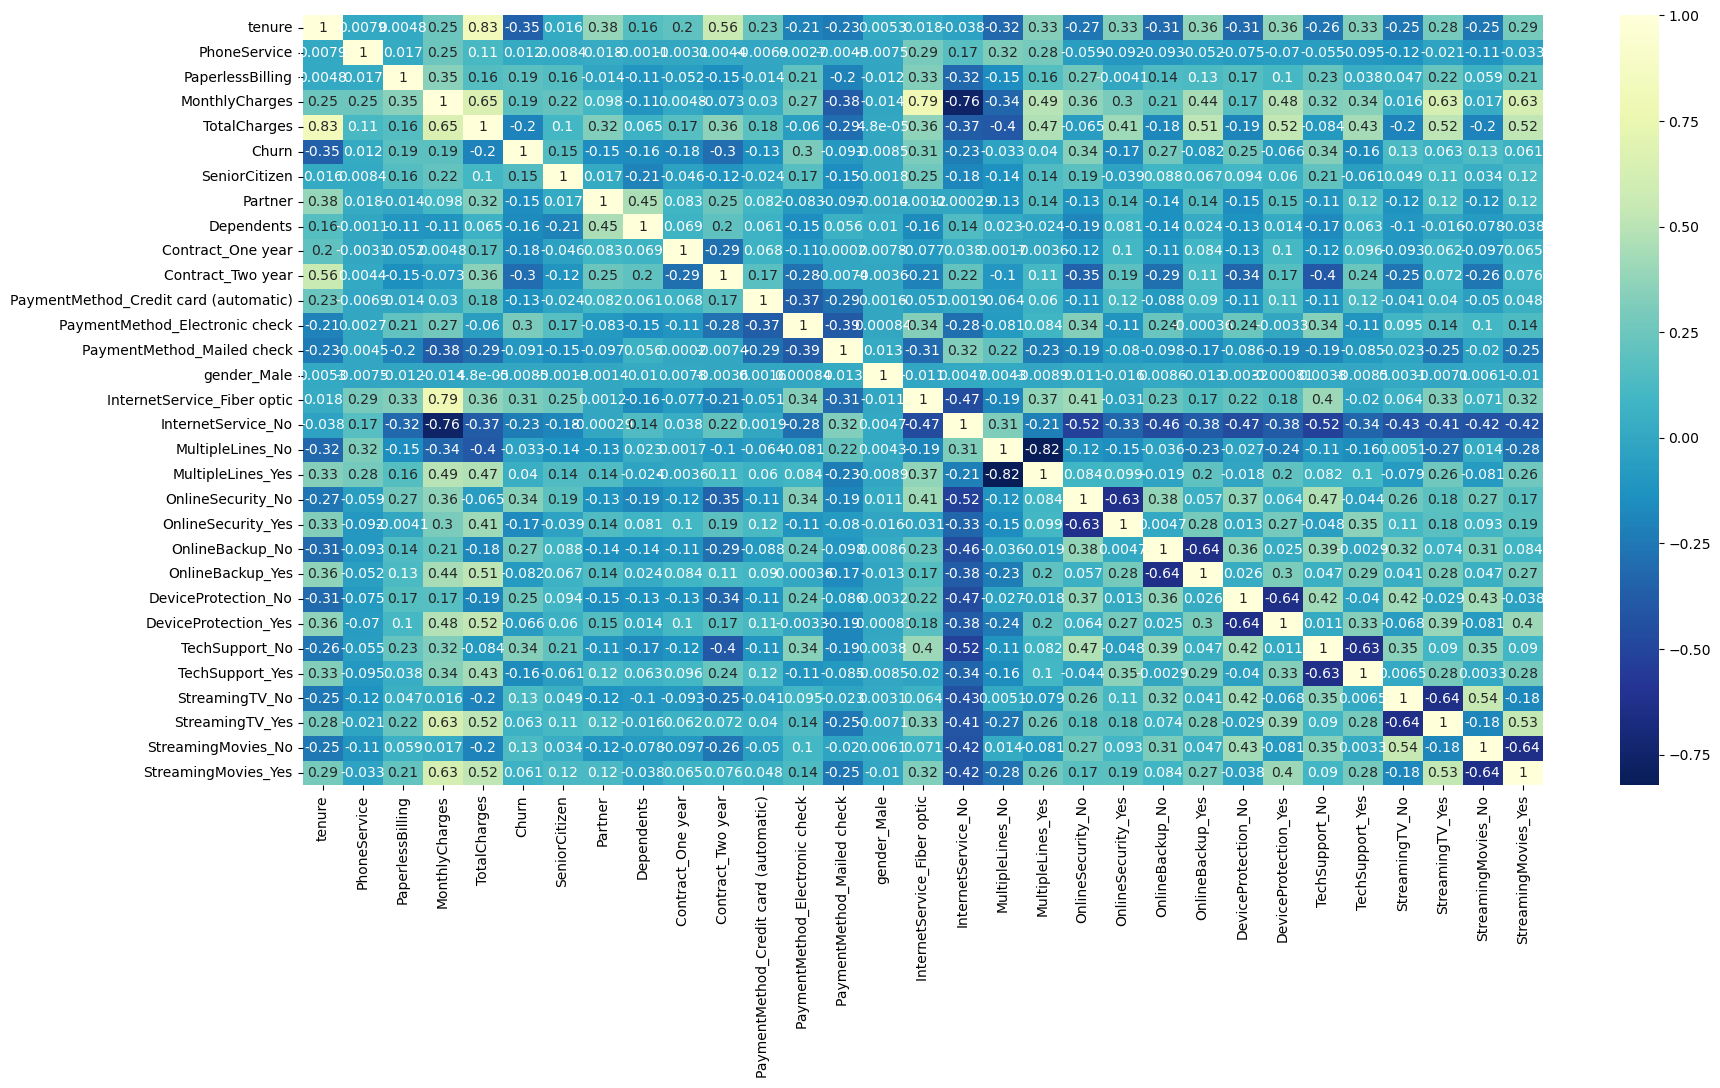

In [949]:
# Review the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True, cmap="YlGnBu_r")
plt.show()

In [950]:
# There are several variables which are highly correlated. Those can be dropped
telecom = telecom.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)

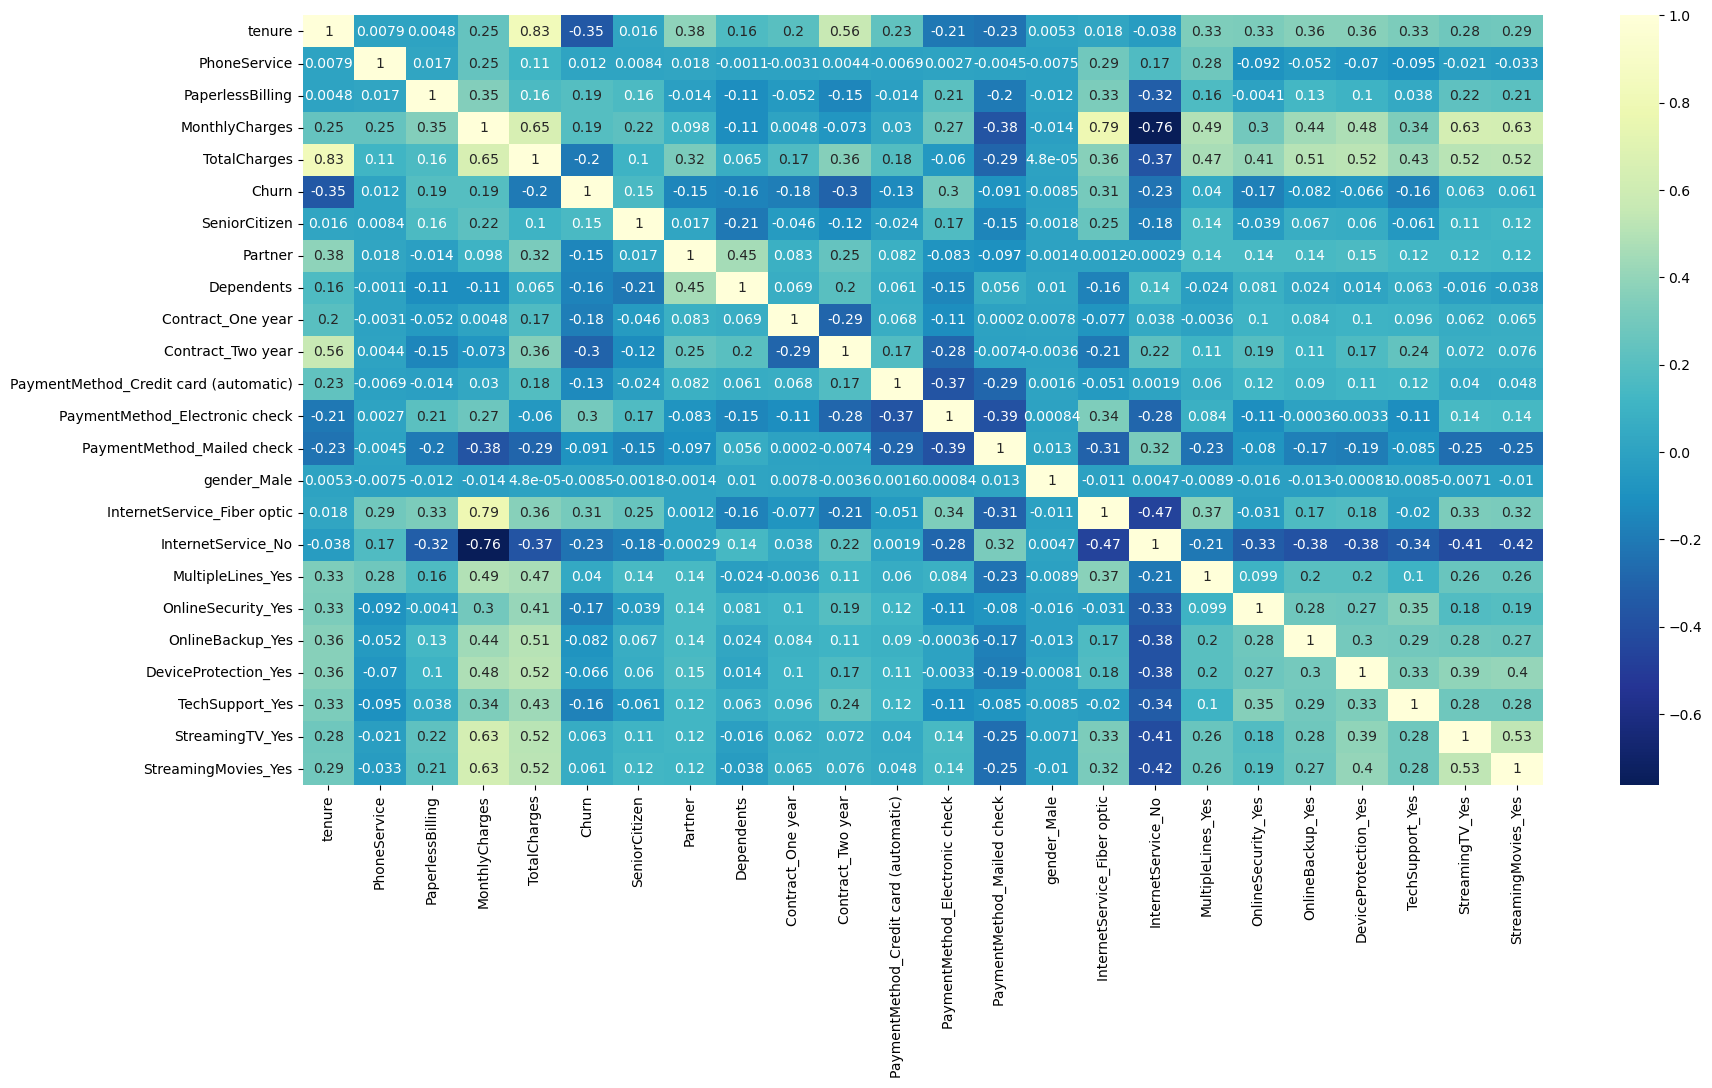

In [951]:
# Review the Correlation matrix again
plt.figure(figsize = (20,10))
sns.heatmap(telecom.corr(),annot = True, cmap="YlGnBu_r")
plt.show()

### D. Prepare Data for Modeling

#### D.1 Split Train-Test Dataset

In [954]:
from sklearn.model_selection import train_test_split

In [955]:
# Move response variable to y
y = telecom.pop('Churn')

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [956]:
# Assign feature variables to X
X = telecom

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,False,True,False,True,False,False,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,True,False,False,False,True,True,False,False,False,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,False,True,False,True,True,False,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,False,True,False,False,False,False,False,False,False,False


In [957]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [958]:
print('X-train Shape: ', X_train.shape)
print('X-test Shape: ', X_test.shape)

X-train Shape:  (4922, 23)
X-test Shape:  (2110, 23)


#### D.2 Scale Feature Data

In [960]:
from sklearn.preprocessing import StandardScaler

In [961]:
# Instantiate and fit a StandardScaler to scale numeric features
scaler = StandardScaler()

scaler = scaler.fit(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,True,False,False,True,False,True,False,False,False,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,False,False,False,False,True,False,False,True,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,False,False,True,True,False,False,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,True,True,False,False,True,True,True,True,True,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,False,True,False,False,False,False,True,True,True,True


#### D.3 Check Imbalance in Dataset

In [963]:
### Check the Churn Rate to assess balance in dataset
(sum(y)/len(y.index))*100

26.578498293515356

Percentage of observations related to customer churn is about 27%. This is significant and hence the dataset can be considered balanced

### E. Build Model

#### E.1 Build First Training Model

In [967]:
import statsmodels.api as sm
from sklearn import metrics

In [968]:
# Define a function to build logistic regression model and print the results
def buildLRModel (y_data, X_data):
    X_data = sm.add_constant(X_data)
    model = sm.GLM(y_data.astype(float), X_data.astype(float), family = sm.families.Binomial())
    model = model.fit()
    print(model.summary())
    return model.predict(X_data.astype(float)), model

In [969]:
# Define a function to compute Accuracy Score and Confusion Metrics for the Model
def computeMetrics (y, y_pred, threshold=0.5):
    # Convert y_pred to np array
    y_pred = y_pred.values.reshape(-1)
    
    # Assign predicted probabilities to response data labels
    y_metrics = pd.DataFrame({'Churn':y.values, 'Churn_Prob':y_pred})
    y_metrics['CustID'] = y.index
    
    # Create new column 'Prediction' with 1 if Churn_Prob > 0.5 else 0
    y_metrics['Prediction'] = y_metrics.Churn_Prob.map(lambda x: 1 if x > threshold else 0)

    # Create the Confusion matrix to assess the quality of the predictions
    confusion = metrics.confusion_matrix(y_metrics.Churn, y_metrics.Prediction )

    # Compute the overall accuracy
    accuracy = metrics.accuracy_score(y_metrics.Churn, y_metrics.Prediction)

    # Return the metrics data along with dataframe containing details
    return y_metrics, confusion, accuracy

In [970]:
# Build initial Logistic Regression model and print result
buildLRModel(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 28 Aug 2024   Deviance:                       4009.4
Time:                        15:18:08   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

(879     0.189138
 5790    0.248281
 6498    0.617278
 880     0.483538
 2784    0.633491
           ...   
 79      0.014794
 3934    0.090636
 5964    0.032712
 6947    0.115332
 5649    0.035876
 Length: 4922, dtype: float64,
 <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x28a20d250>)

#### E.2 Select Features Using RFE

In [972]:
# Instantiate the LogisticRegression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [973]:
# Execute RFE with 15 out of 23 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [974]:
# Review the columns selected by RFE algorithm
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [975]:
# Review the columns which are dropped by RFE
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

#### E.3 Create & Assess LR Model with Selected Features

In [977]:
# Build Logistic Regression model with RFE-selected features, print results and store predictions
y_train_pred, lr_model = buildLRModel(y_train, X_train[X_train.columns[rfe.support_]])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Wed, 28 Aug 2024   Deviance:                       4022.2
Time:                        15:18:09   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [978]:
# Review the predicted values on the train set
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [979]:
# Compute and obtain the model quality metrics
y_train_metric, confusion_train, accuracy_train = computeMetrics(y_train, y_train_pred)

In [980]:
# Print the metric data frame
print('Metrics Dataframe:')
print(y_train_metric.head())

# Print the accuracy metric
print('\nAccuracy Score: ', round(accuracy_train, 3))

# Print the confusion matrix
print('\nConfusion Matrix:')
print(confusion_train)

Metrics Dataframe:
   Churn  Churn_Prob  CustID  Prediction
0      0    0.192642     879           0
1      0    0.275624    5790           0
2      1    0.599507    6498           1
3      1    0.513571     880           1
4      1    0.648233    2784           1

Accuracy Score:  0.81

Confusion Matrix:
[[3275  360]
 [ 574  713]]


In [981]:
# Layout of the Confusion Matrix

# Predicted     not_churn    churn
# Actual
# not_churn        3275      360
# churn            574       713  

#### E.4 Eliminate Co-related Features Using VIF and Rebuild Model

In [983]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [984]:
# Create a function to check for the VIF values of the feature variables

def computeVIF (X):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    col = X.columns
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float), i) for i in range(len(col))]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [985]:
# Check the VIF values for X_train dataset
col = X_train.columns[rfe.support_]
computeVIF(X_train[col])

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [987]:
col = col.drop('MonthlyCharges', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [988]:
# Rebuild the model using the selected variables
y_train_pred, lr_model = buildLRModel(y_train, X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Wed, 28 Aug 2024   Deviance:                       4046.2
Time:                        15:18:09   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [989]:
# Compute and obtain the model quality metrics
y_train_metric, confusion_train, accuracy_train = computeMetrics(y_train, y_train_pred)

In [990]:
# Print the metric data frame
print('Metrics Dataframe:')
print(y_train_metric.head())

# Print the accuracy metric
print('\nAccuracy Score: ', round(accuracy_train, 3))

# Print the confusion matrix
print('\nConfusion Matrix:')
print(confusion_train)

Metrics Dataframe:
   Churn  Churn_Prob  CustID  Prediction
0      0    0.227902     879           0
1      0    0.228644    5790           0
2      1    0.674892    6498           1
3      1    0.615868     880           1
4      1    0.662260    2784           1

Accuracy Score:  0.806

Confusion Matrix:
[[3269  366]
 [ 590  697]]


So overall the accuracy hasn't dropped much.

##### VIF Iteration-2: Check the VIFs again and Rebuild Model

In [993]:
# Check the VIF values for X_train dataset
computeVIF(X_train[col])

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [994]:
# Drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [995]:
# Rebuild the model using the selected variables
y_train_pred, lr_model = buildLRModel(y_train, X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Wed, 28 Aug 2024   Deviance:                       4051.9
Time:                        15:18:09   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [996]:
# Compute and obtain the model quality metrics
y_train_metric, confusion_train, accuracy_train = computeMetrics(y_train, y_train_pred)

In [997]:
# Print the metric data frame
print('Metrics Dataframe:')
print(y_train_metric.head())

# Print the accuracy metric
print('\nAccuracy Score: ', round(accuracy_train, 3))

# Print the confusion matrix
print('\nConfusion Matrix:')
print(confusion_train)

Metrics Dataframe:
   Churn  Churn_Prob  CustID  Prediction
0      0    0.245817     879           0
1      0    0.265361    5790           0
2      1    0.669410    6498           1
3      1    0.630970     880           1
4      1    0.682916    2784           1

Accuracy Score:  0.806

Confusion Matrix:
[[3278  357]
 [ 597  690]]


The accuracy is still practically the same.

##### VIF Iteration-3: Check the VIFs again and Rebuild Model

In [1000]:
# Check the VIF values for X_train dataset
computeVIF(X_train[col])

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only which has Accuracy Score of 0.806

In [1002]:
# Take a look at the confusion matrix again 
confusion_train

array([[3278,  357],
       [ 597,  690]])

In [1003]:
# Actual/Predicted     not_churn    churn
        # not_churn        3278      357
        # churn            597       690  

### F. Evaluate Model Quality

#### F.1 Compute Classification Metrics

In [1006]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [1007]:
# Compute the accuracy of our logistic regression model - % of correct prediction
(TP+TN)/(TP+TN+FP+FN)

0.8061763510767981

In [1008]:
# Compute the sensitivity - % of correctly predicted churns (positives) against all actual churns (positives)
# Sensitivity = Prediction accuracy of positives
TP / float(TP+FN)

0.5361305361305362

In [1009]:
# Calculate specificity - % of correctly predicted not-churns (negatives) against all actual not-churns (negatives)
# Specificity = Prediction accuracy of negatives
TN / float(TN+FP)

0.9017881705639614

In [1010]:
# Calculate false postive rate - predicting churn when customers have not churned
# FPR = Prediction in-accuracy of negatives (1 - Specificity)
print(FP/ float(TN+FP))

0.09821182943603851


In [1011]:
# Calculate positive predictive rate 
print (TP / float(TP+FP))

0.6590257879656161


In [1012]:
# Compute negative predictive value
print (TN / float(TN+ FN))

0.8459354838709677


#### F.2 Plot the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1015]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return None

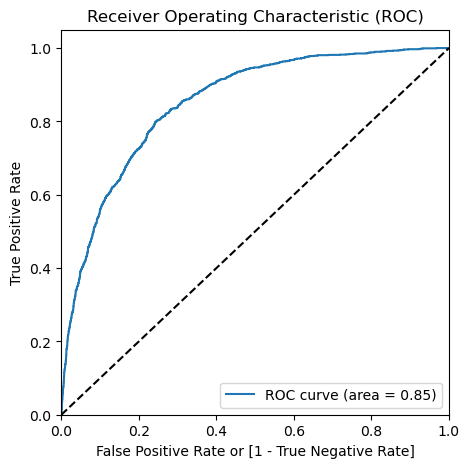

In [1016]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### F.3 Find Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1019]:
# Create columns with different probability cutoffs 
probabilities = [float(x)/10 for x in range(10)]
for i in probabilities:
    y_train_metric[i]= y_train_metric.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_metric.head()

,Churn,Churn_Prob,CustID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [1020]:
# Now calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in probabilities:
    confusion = metrics.confusion_matrix(y_train_metric.Churn, y_train_metric[i] )
    total=sum(sum(confusion))
    accuracy = (confusion[0,0]+confusion[1,1])/total
    
    speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.261479     1.000000     0.000000
0.1   0.1  0.614994     0.943279     0.498762
0.2   0.2  0.721861     0.846154     0.677854
0.3   0.3  0.770012     0.776224     0.767813
0.4   0.4  0.790532     0.636364     0.845117
0.5   0.5  0.806176     0.536131     0.901788
0.6   0.6  0.798050     0.380730     0.945805
0.7   0.7  0.776310     0.196581     0.981568
0.8   0.8  0.747867     0.041181     0.998074
0.9   0.9  0.738521     0.000000     1.000000


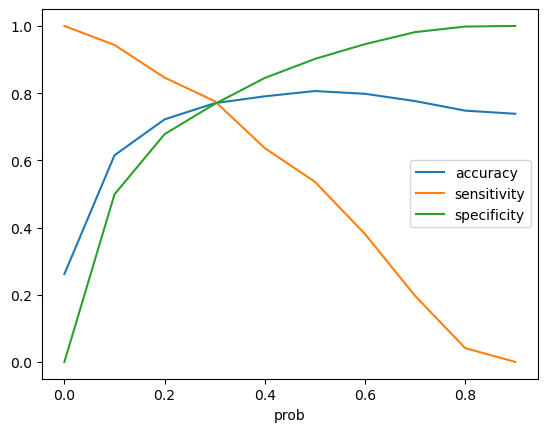

In [1021]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

#### F.4 Re-evaluate Classification Metrics

In [1024]:
y_train_metric['final_prediction'] = y_train_metric.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_metric.head()

,Churn,Churn_Prob,CustID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [1025]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_metric.Churn, y_train_metric.final_prediction), 3)

0.77

In [1026]:
# Review the confusion matrix
confusion = metrics.confusion_matrix(y_train_metric.Churn, y_train_metric.final_prediction )
confusion

array([[2791,  844],
       [ 288,  999]])

In [1027]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1028]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 3)

0.776

In [1029]:
# Let us calculate specificity
round(TN / float(TN+FP), 3)

0.768

In [1030]:
# Calculate false postive rate - predicting churn when customer does not have churned
round(FP/ float(TN+FP), 3)

0.232

In [1031]:
# Positive predictive value 
round (TP / float(TP+FP), 3)

0.542

In [1032]:
# Negative predictive value
round (TN / float(TN+ FN), 3)

0.906

 As can be observed, a trade-off for **Accuracy** (0.77), **Sensitivity** (0.776) and **Specificity** (0.768) has been achieved while keeping the **False Positive Rate** low at 0.232.

#### F.5 Evaluate Precision and Recall Metrics

In [1035]:
from sklearn.metrics import precision_score, recall_score

In [1036]:
# Compute Precision score - TP/(TP + FP)
# Precision - % of correct positive prediction out of total positive predictions
print('Precision Score: ', round(precision_score(y_train_metric.Churn, y_train_metric.Prediction), 3))

Precision Score:  0.659


In [1037]:
# Compute Recall score - TP/(TP + FN)
# Recall - % of correct positive prediction out of total actual positives
print('Recall Score: ', round(recall_score(y_train_metric.Churn, y_train_metric.Prediction), 3))

Recall Score:  0.536


In [1038]:
# Review Precision and recall tradeoff

In [1039]:
from sklearn.metrics import precision_recall_curve

In [1040]:
precision, recall, thresholds = precision_recall_curve(y_train_metric.Churn, y_train_metric.Churn_Prob)

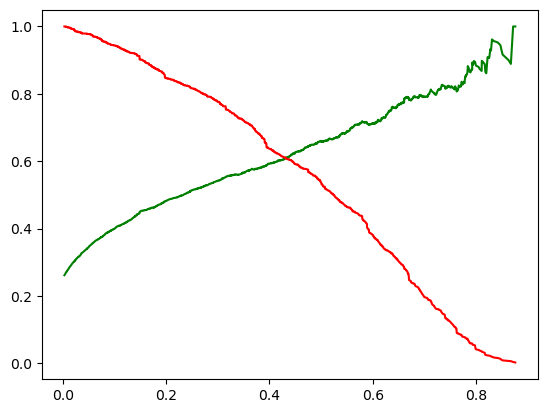

In [1041]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

In [1042]:
# As per above graph, a threshold probability of 0.45 is most optimal between precision and recall

### G. Make Predictions on the Test Set

In [1044]:
# Let's scale X_test with the same features that were used to fit scaler
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [1045]:
# Retain only those features in X-test which are part of the final model
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0,False,False,True,False,True,False,False,False,False,True
3730,0.999203,1,0,False,False,True,False,True,False,True,False,True,True
1761,1.040015,1,0,False,True,True,False,False,True,True,False,False,False
2283,-1.286319,1,0,False,False,False,True,True,False,False,False,False,False
1872,0.346196,0,0,False,True,False,False,False,True,False,False,False,False


In [1046]:
# Make predictions on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm.astype('float'))
y_test_pred[:10]

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
1970    0.692893
2532    0.285289
1616    0.008994
2485    0.602307
5914    0.145153
dtype: float64

In [1160]:
# Compute and obtain the model quality metrics for test dataset
y_test_metric, confusion_test, accuracy_test = computeMetrics(y_test, y_test_pred, 0.3)

In [1162]:
# Review the test_metric prediction dataframe
y_test_metric.head()

,Churn,Churn_Prob,CustID,Prediction
0,0,0.419725,942,1
1,1,0.260232,3730,0
2,0,0.008650,1761,0
3,1,0.592626,2283,1
4,0,0.013989,1872,0


In [1164]:
# Let's check the overall accuracy
print ('Test Accuracy Score: ', round(accuracy_test, 3))

Test Accuracy Score:  0.741


In [1166]:
# Also check the confusion matrix
confusion_test

array([[1144,  384],
       [ 163,  419]])

In [1168]:
# Compute the key classification metrics
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1170]:
# Sensitivity
print('Sensitivity: ', round(TP / float(TP+FN), 3))

# Specificity
print('Specificity: ', round(TN / float(TN+FP), 3))

Sensitivity:  0.72
Specificity:  0.749


### H. Conclusion

* The logistic regression model assigns a probability score to each customer, indicating how likely they are to churn
* At first, classes were assigned to all the customers in the train data set using a probability cutoff of 0.5
* The model thus made, was very accurate (Accuracy about 80%), but it had a very low sensitivity (approx. 53%).
* Hence, 0.5 as the cutoff for probability was not appropriate for the model. So we tried with the cutoff, until we got the most useful model.
* Thus, a different cutoff was arrived at, i.e. 0.3, which resulted in a model with slightly lower accuracy (approx. 77%), but a much better sensitivity (approx. 78%).
* Using test data, the scores for **Sensitivity** (0.72) and **Specificity** (0.749) are found to be very similar to Train Scores indicating that we have a stable model that's not overfitting the training datasets.

<BR>
The probability of churn is defined by the equation:

$$
	{Probability}(P) = \frac{1}{1 + e^{-z}}
$$

where $z$ in our model is defined as follows:

$z = -1.658 - 0.943  \times  tenure + 0.346 \times PaperlessBilling + 0.46 \times SeniorCitizen - 0.722 \times Contract\_One\_year$ 
$- 1.3 \times Contract\_Two\_year - 0.388 \times PaymentMethod\_Credit\_card - 0.331 \times PaymentMethod\_Mailed\_check$
$+ 0.805 \times InternetService\_Fiber - 0.973 \times InternetService\_No + 0.21 \times MultipleLines\_Yes - 0.405 \times TechSupport\_Yes$
$+ 0.34 \times StreamingTV\_Yes + 0.243 \times StreamingMovies\_Yes$

Features with negative coefficients reduces `Churn` probability, while features with positive coefficients increases it.

The model features which are important to determine customer churn are:

1. Contract Years - Longer contracts reduce churn
2. Internet Service - Having internet service increases churn
3. Tenure - Higher tenure reduces churn
4. StreamingTV - Having StreamingTV increases churn
5. Senior Citizen - Senior citizens have higher churn

**Note:** The `sensitivity` of a model is the proportion of `yeses` (or positives) correctly predicted by it as `yeses` (or positives). Also, the `specificity` is equal to the proportion of `nos` (or negatives) correctly predicted by the model as `nos` (or negatives). For any given model, if the sensitivity increases by changing the cutoff, its specificity goes down.